In [1]:
import cv2       # 读取格式为BGR
import matplotlib.pyplot as plt   # 读取格式为RGB
import numpy as np
import numpy as np
%matplotlib inline

import os

In [2]:
os.getcwd()

'D:\\pythonlearning'

In [3]:
img = cv2.imread('opencv/class_2_7/cat.jpg')

In [10]:
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [4]:
cv2.imshow("image", img)

cv2.waitKey(0)   # 等待时间，毫秒级，0代表任意键终止
cv2.destroyAllWindows()

In [2]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
cv_show('image', img)

In [9]:
img.shape   # h, w, c

(414, 500, 3)

In [11]:
img1 = cv2.imread('opencv/class_2_7/cat.jpg', cv2.IMREAD_GRAYSCALE) # 灰度图
img1.shape

(414, 500)

In [13]:
cv_show('image', img1)

In [15]:
img.size, img1.size

(621000, 207000)

读取视频

In [22]:
vc = cv2.VideoCapture('opencv/class_2_7/test.mp4')

In [23]:
# 检查是否打开正确
if vc.isOpened():
    open, frame = vc.read()   # 读取第一帧
else:
    open = false        

In [24]:
open

True

In [25]:
# 遍历视频每一帧图片
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

In [26]:
# 截取部分图像
cat = img[0:200, 0:200]
cv_show('cat', cat)

In [27]:
# 颜色通道提取
b, g, r = cv2.split(img)

In [28]:
cv_show('b', b)

In [29]:
cv_show('g', g)

In [30]:
cv_show('r', r)

In [32]:
img = cv2.merge((b, g, r))   # 合并通道
cv_show('img', img)

In [33]:
# 只保留R
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 1] = 0
cv_show('R', cur_img)

边界填充

In [34]:
top, bottom, left, right = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_REPLICATE)    # 复制
reflect = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_REFLECT)    # 反射
reflect101 = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_REFLECT_101)   # 另一种反射
wrap = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_WRAP)    # 包装法
constant = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_CONSTANT, value=0)    # 值填充

(<AxesSubplot:title={'center':'constant'}>,
 Text(0.5, 1.0, 'constant'))

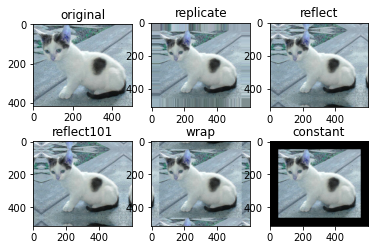

In [35]:
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('reflect101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('constant')

In [37]:
# 改变图像大小
img2 = cv2.resize(img, (400, 400))
cv_show('img2', img2)

In [39]:
img3 = cv2.resize(img, (0, 0), fx=1, fy=1.5)   # 改变宽高比
cv_show('img3', img3)

In [42]:
dog = cv2.imread('opencv/class_2_7/dog.jpg')
dog1 = cv2.resize(dog, (400, 400))
cv_show('dog', dog1)

In [43]:
cag = cv2.addWeighted(img2, 0.4, dog1, 0.6, 0)   # 0.4ximg2 + 0.6xdog1 + 0
cv_show('cag', cag)

阈值处理

In [44]:
img = cv2.imread('opencv/class_2_7/cat.jpg', cv2.IMREAD_GRAYSCALE)

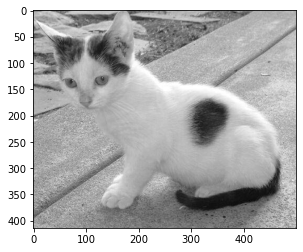

In [60]:
plt.imshow(img, 'gray')

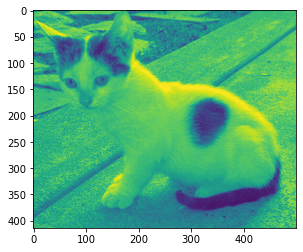

In [61]:
plt.imshow(img)

In [62]:
cv_show('1', img)

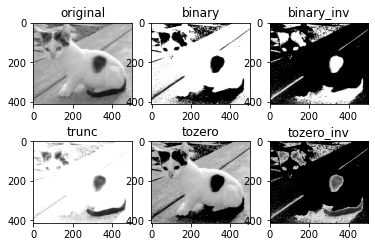

In [58]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)    # >127 =255,else =0
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)   # <127 =255,else =0
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)   # > 127 =255,else no change
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)   # > 127 no change,else =0
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)   # < 127 no change,else = 0

titles = ['original', 'binary', 'binary_inv', 'trunc', 'tozero', 'tozero_inv']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
plt.show()

平滑处理

In [63]:
img = cv2.imread('opencv/class_2_7/lenaNoise.png')

In [64]:
cv_show('1', img)

In [65]:
# 均值滤波，简单的平均卷积操作
blur = cv2.blur(img, (3, 3))

cv_show('blur', blur)

In [67]:
# 方框滤波
# 基本和均值一样，可以选择归一化
box = cv2.boxFilter(img, -1, (3, 3), normalize=True)

cv_show("box", box)

In [68]:
# 不归一化容易越界
box1 = cv2.boxFilter(img, -1, (3, 3), normalize=False)

cv_show("box1", box1)

In [69]:
# 高斯滤波
# 卷积核的值服从高斯分布，重视中间的
gaussian = cv2.GaussianBlur(img, (3, 3), 1)

cv_show("gaussian", gaussian)

In [71]:
# 中值滤波
# 相当于用中间值代替
median = cv2.medianBlur(img, 5)

cv_show('median', median)

In [72]:
import numpy as np

In [74]:
# 展示所有的
res = np.hstack((blur, gaussian, median))   # 水平拼接，vstack 垂直拼接
cv_show('all', res)

形态学-腐蚀操作

In [75]:
img = cv2.imread('opencv/class_2_7/dige.png')

cv_show('img', img)

In [77]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

cv_show('erosion', erosion)

In [78]:
pie = cv2.imread('opencv/class_2_7/pie.png')

cv_show('pie', pie)

In [80]:
kernel = np.ones((30, 30), np.uint8)
erosion1 = cv2.erode(pie, kernel, iterations=1)
erosion2 = cv2.erode(pie, kernel, iterations=2)
erosion3 = cv2.erode(pie, kernel, iterations=3)
res = np.hstack((erosion1,erosion2,erosion3))
cv_show('all', res)

形态学-膨胀操作

In [81]:
img = cv2.imread('opencv/class_2_7/dige.png')

cv_show('img', img)

In [82]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

cv_show('erosion', erosion)

In [83]:
kernel = np.ones((3, 3), np.uint8)
dilate = cv2.dilate(erosion, kernel, iterations=1)

cv_show('dilate', dilate)

In [84]:
pie = cv2.imread('opencv/class_2_7/pie.png')
kernel = np.ones((30, 30), np.uint8)
erosion1 = cv2.erode(pie, kernel, iterations=1)
erosion2 = cv2.erode(pie, kernel, iterations=2)
erosion3 = cv2.erode(pie, kernel, iterations=3)
res = np.hstack((erosion1,erosion2,erosion3))
cv_show('all', res)

In [85]:
dilate1 = cv2.dilate(pie, kernel, iterations=1)
dilate2 = cv2.dilate(pie, kernel, iterations=2)
dilate3 = cv2.dilate(pie, kernel, iterations=3)
res = np.hstack((dilate1,dilate2,dilate3))
cv_show('all', res)

开运算与闭运算

In [87]:
# 开：先腐蚀在膨胀
img = cv2.imread('opencv/class_2_7/dige.png')

kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv_show('open', opening)

In [88]:
# 闭： 先膨胀在腐蚀
kernel = np.ones((5, 5), np.uint8)
closeing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv_show('nclose', closeing)

梯度运算

In [89]:
# 梯度 = 膨胀 - 腐蚀
pie = cv2.imread('opencv/class_2_7/pie.png')
kernel = np.ones((7, 7), np.uint8)
dilate = cv2.dilate(pie, kernel, iterations = 5)
erosion = cv2.erode(pie, kernel, iterations = 5)

res = np.hstack((dilate, erosion))
cv_show("all", res)

In [90]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv_show('grad', gradient)

顶帽与黑帽

In [91]:
# 顶帽 = 原始输入 - 开运算结果
img = cv2.imread('opencv/class_2_7/dige.png')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

cv_show('top', tophat)

In [92]:
# 黑帽 = 闭运算 - 原始输入
black = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

cv_show('black', black)

图像梯度,乘上sobel算子

In [3]:
img = cv2.imread('opencv/class_2_7/pie.png')
sobelx  = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)   # ddepth 图像深度,dx 水平方向,dy 竖直方向,ksize sobel算子大小

cv_show('sobelx', sobelx)

In [4]:
sobelx  = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  
sobelx = cv2.convertScaleAbs(sobelx)   # 取绝对值
cv_show('sobelx', sobelx)

In [5]:
sobely  = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  
sobely = cv2.convertScaleAbs(sobely)   # 取绝对值
cv_show('sobely', sobely)

In [8]:
# 分别计算x和y，再求和
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
cv_show('xy', sobelxy)

In [7]:
# 直接计算，效果不好
sobelxy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy)   
cv_show('sobelxy', sobelxy)

In [3]:
img = cv2.imread('opencv/class_2_7/lena.jpg')
cv_show('img', img)

In [9]:
import numpy as np

In [4]:
# 不同算子的比较，sobel，scharr， laplacian
img = cv2.imread('opencv/class_2_7/lena.jpg', cv2.THRESH_BINARY)
sobelx  = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  
sobelx = cv2.convertScaleAbs(sobelx) 
sobely  = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

scharrx  = cv2.Scharr(img, cv2.CV_64F, 1, 0)  
scharrx = cv2.convertScaleAbs(scharrx) 
scharry  = cv2.Scharr(img, cv2.CV_64F, 0, 1)  
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy, scharrxy, laplacian))
cv_show('all', res)

Canny边缘检测
    1.使用高斯滤波器来平滑图像，滤除噪声
    2.计算图像每个像素的梯度强度和方向
    3.应用非极大值抑制来消除边缘检测带来的杂散响应
    4.应用双阈值检测来确定真实的和潜在的边缘
    5.通过抑制孤立的弱边缘最终完成边缘检测

In [5]:
img = cv2.imread('opencv/class_2_7/lena.jpg', cv2.IMREAD_GRAYSCALE)

v1 = cv2.Canny(img, 80, 150)   # <80 舍弃，> 150 为边界
v2 = cv2.Canny(img, 50, 100)

res = np.hstack((v1, v2))
cv_show('all', res)

In [15]:
img = cv2.imread('opencv/class_2_7/car.png', cv2.IMREAD_GRAYSCALE)

v1 = cv2.Canny(img, 120, 250)   # <80 舍弃，> 150 为边界
v2 = cv2.Canny(img, 50, 100)

res = np.hstack((v1, v2))
cv_show('all', res)

图像金字塔：
高斯金字塔
拉普拉斯金字塔

In [16]:
img = cv2.imread('opencv/class_2_7/AM.png')
cv_show('1', img)
print(img.shape)

(442, 340, 3)


In [17]:
# 高斯金字塔
up = cv2.pyrUp(img)
cv_show('1', up)
print(up.shape)

(884, 680, 3)


In [18]:
down = cv2.pyrDown(img)
cv_show('1', down)
print(down.shape)

(221, 170, 3)


In [19]:
# 拉普拉斯金字塔 = 输入图像 - 先经过金字塔下采样再上采样的图像
down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
l = img - down_up
cv_show('laplacian', l)

图像轮廓

In [6]:
# 为了更高的准确率，使用二值图像
img = cv2.imread('opencv/class_2_7/contours.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 转化为灰度图
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)   # 变成二值图
cv_show('thresh',thresh)

In [33]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)   # mode:轮廓检索方法  method:轮廓逼近方法
# 返回轮廓信息和层级

In [34]:
# 绘制轮廓
# 传入原始图像， 轮廓信息， 轮廓索引， 颜色模式， 线条厚度（要使用copy，否则原图会改变）
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)   # 将轮廓画到图像上，-1代表所有层次，（B， G， R）
cv_show('1', res)

In [35]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 0, (0, 0, 255), 2)   # 将轮廓画到图像上，-1代表所有层次，（B， G， R）
cv_show('1', res)

In [36]:
cv_show('1', img)

In [37]:
cv_show('1', draw_img)

In [38]:
# 轮廓特征
cnt = contours[0]
# 面积
cv2.contourArea(cnt)

8500.5

In [39]:
# 周长， True表示闭合的
cv2.arcLength(cnt, True)

437.9482651948929

轮廓近似，直线逼近曲线

In [41]:
img = cv2.imread('opencv/class_2_7/contours2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 转化为灰度图
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
cv_show('1', res)

In [43]:
epsilon = 0.01*cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)   # epsilon为阈值

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)   # 将逼近后的图像画到原图像上
cv_show('1', res)

边界矩形

In [45]:
img = cv2.imread('opencv/class_2_7/contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 转化为灰度图
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv_show('img',img)

In [47]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print('轮廓面积与边界矩形比:',extent)

轮廓面积与边界矩形比 0.5154317244724715


外接圆

In [49]:
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
cv_show('img',img)

模板匹配

In [53]:
img = cv2.imread('opencv/class_8/lena.jpg', 0)
template = cv2.imread('opencv/class_8/face.jpg', 0)
h, w = template.shape[:2]

In [54]:
template.shape

(110, 85)

In [60]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']  # + _NORMED 代表归一化后的，推荐使用

In [56]:
res = cv2.matchTemplate(img, template, 1)   # 比较模型匹配，1是比较方法的一种
res.shape

(154, 179)

In [57]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # 最小值，最大值，最小值坐标位置， 最大值坐标位置

In [58]:
min_val, max_val, min_loc, max_loc 

(0.0002352227020310238, 0.5173118114471436, (107, 89), (39, 153))

4


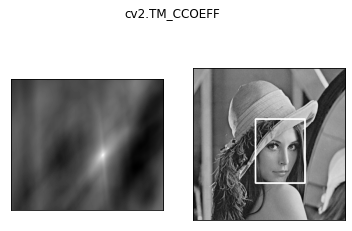

5


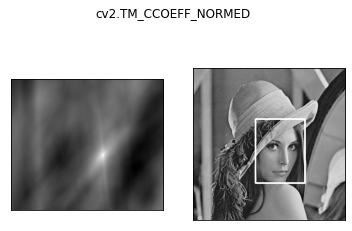

2


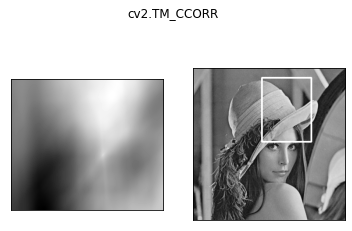

3


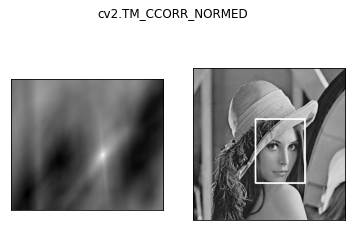

0


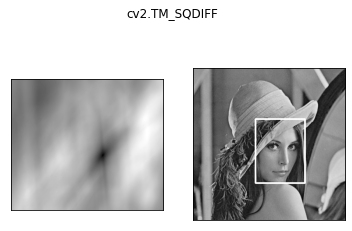

1


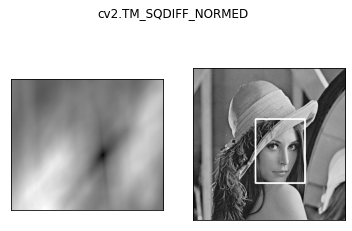

In [62]:
# 比较不同方法
for meth in methods:
    img2 = img.copy()
    
    method = eval(meth)   # 变字符串为数值
    print(method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果是平方差匹配TM_SQDIFF或归一化后的TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF_NORMED, cv2.TM_SQDIFF]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # 画矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    
    
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])   # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

匹配多个对象

In [7]:
img_rgb = cv2.imread('opencv/class_8/mario.jpg' )
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread("opencv/class_8/mario_coin.jpg", 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
thresh = 0.8
# 取匹配程度大于0.8的坐标
loc = np.where(res >= thresh)
for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)
    
cv_show('img_rgb', img_rgb)

直方图

In [64]:
img = cv2.imread('opencv/class_8/cat.jpg', 0)   # 0表示灰度图
hist = cv2.calcHist([img], [0], None, [256], [0, 256])   
# images:传入图像，用【】,channels:灰度图[0],彩色图BGR[0][1][2],mask:掩模图像，None为整幅图像的直方图,histSize:BIN数目,ranges:像素范围
hist.shape

(256, 1)

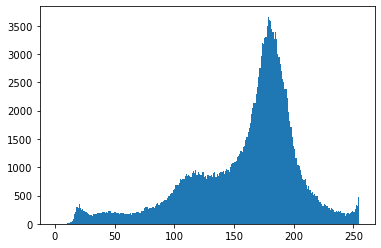

In [66]:
plt.hist(img.ravel(), 256)
plt.show()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'


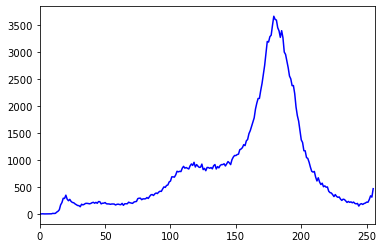

In [68]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

mask操作

In [8]:
# 创建mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255  # 为255时，掩码图像会保留,白的地方就保留，黑的地方就掩盖
cv_show('1', mask)

In [9]:
mask_img = cv2.bitwise_and(img, img, mask=mask)   # 与操作
cv_show('1', mask_img)

In [72]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

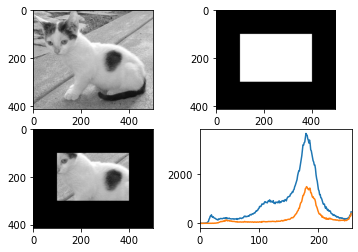

In [73]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(mask_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

直方图均衡化

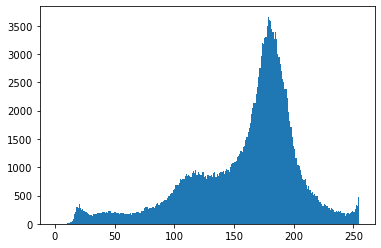

In [74]:
img = cv2.imread('opencv/class_8/cat.jpg', 0)
plt.hist(img.ravel(), 256)
plt.show()

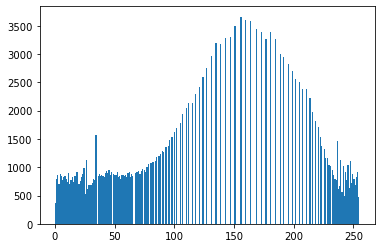

In [75]:
equ = cv2.equalizeHist(img)   # 均衡化
plt.hist(equ.ravel(), 256)
plt.show()

In [76]:
res = np.hstack((img, equ))
cv_show('1', res)

自适应直方图均衡化

In [77]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))   # 分成小格再均衡化

In [78]:
res_clahe = clahe.apply(img)
res = np.hstack((img, equ, res_clahe))
cv_show('1', res)

傅里叶变换

高频：变化剧烈的灰度分量，如边界
低频：变化缓慢

滤波   低通道滤波：只保留低频，使图像模糊     高通道滤波：只保留高频，使图像细节增强

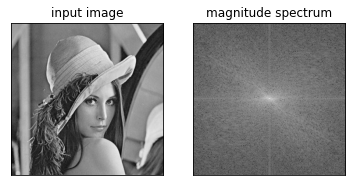

In [79]:
# 输入图像先转化为np.float32格式
img = cv2.imread('opencv/class_8/lena.jpg', 0)
img_float = np.float32(img)
dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)   # 得到的结果中频率为0的部分在左上角，需要转换到中心位置，用shift实现
dft_shift = np.fft.fftshift(dft)    # cv2.dft（）返回的结果是双通道的（实部，虚部），要转化为图像格式才能展示

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))   # 对两个通道进行转换，然后可以展示

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('magnitude spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

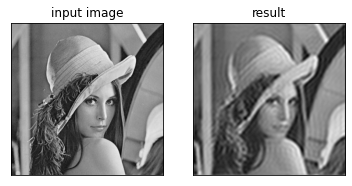

In [80]:
# 低频滤波
img = cv2.imread('opencv/class_8/lena.jpg', 0)
img_float = np.float32(img)

dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)   
dft_shift = np.fft.fftshift(dft)    

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols / 2)   # 中心位置

# 低通道滤波
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# idft:dft的逆变换
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)  # 将在中心位置的移回原位
img_back = cv2.idft(f_ishift)   # 逆变换，还原回去
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])   # 对通道转换，才能展示
   

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap = 'gray')
plt.title('result'), plt.xticks([]), plt.yticks([])
plt.show()

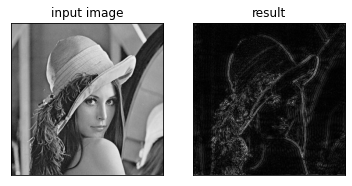

In [81]:
# 高频滤波
img = cv2.imread('opencv/class_8/lena.jpg', 0)
img_float = np.float32(img)

dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)   
dft_shift = np.fft.fftshift(dft)    

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols / 2)   # 中心位置

# 低通道滤波
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# idft:dft的逆变换
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)  # 将在中心位置的移回原位
img_back = cv2.idft(f_ishift)   # 逆变换，还原回去
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])   # 对通道转换，才能展示
   

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap = 'gray')
plt.title('result'), plt.xticks([]), plt.yticks([])
plt.show()

角点

In [10]:
# img:为float32的输入图像,blockSize:角点检测中指定区域,ksize:sobel求导中使用的窗口大小,k取值参数为[0.04, 0.06]
img = cv2.imread('opencv/class_11_12/chessboard.jpg')
print('img shape:', img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)   # blockSize=2, ksize=3, k=0.04
print('dst shape', dst.shape)

img shape: (512, 512, 3)
dst shape (512, 512)


In [11]:
img[dst>0.01*dst.max()] = [0, 0, 255]
cv_show('1', img)

Scale Invariant Feature Transform(SIFT)

In [15]:
img = cv2.imread('opencv/class_11_12/test_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [16]:
cv2.__version__   # 高版本不行，opencv-python==3.4.1.15, opencv-contrib-python==3.4.1.15

'4.5.5'

In [19]:
# 得到特征点
sift = cv2.xfeatures2d.SIFT_create()
# sift = cv2.SIFT.create()
kp = sift.detect(gray, None)   # keypoint

In [20]:
img = cv2.drawKeypoints(gray, kp, img)   # 绘制关键点

cv_show('1', img)

In [21]:
# 计算特征
kp, des = sift.compute(gray, kp)

In [22]:
print(np.array(kp).shape)

(6809,)


In [23]:
des.shape

(6809, 128)

特征匹配（比较关键点）

Brute-Force蛮力匹配

In [24]:
img1 = cv2.imread('opencv/class_11_12/box.png', 0)
img2 = cv2.imread('opencv/class_11_12/box_in_scene.png', 0)

In [26]:
cv_show('1', img1)

In [27]:
cv_show('2', img2)

In [28]:
sift = cv2.xfeatures2d.SIFT_create()

In [29]:
kp1, des1 = sift.detectAndCompute(img1, None)   # 得到关键点和关键点特征向量
kp2, des2 = sift.detectAndCompute(img2, None)

In [30]:
bf = cv2.BFMatcher(crossCheck=True)   # 蛮力匹配

In [32]:
# 1对1匹配
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [33]:
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)   # 取距离最近的10个关键点

In [34]:
cv_show('3', img3)

In [35]:
# k对最佳匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [36]:
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

In [40]:
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
cv_show('3', img3)

如果需要更快速完成操作，可以使用cv2.FlannBasedMatcher

背景建模

In [42]:
cap = cv2.VideoCapture('opencv/class_16_17/test.avi')
# 形态学操作需要使用
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# 创建混合高斯模型用于背景建模
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    # 形态学开运算去噪声
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    # 找轮廓
    contours, hierarchy = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for c in contours:
        # 计算各轮廓周长
        perimater = cv2.arcLength(c, True)
        if perimater > 188:
            # 轮廓矩形的信息
            x, y, w, h = cv2.boundingRect(c)
            # 画矩形
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    cv2.imshow('frame', frame)
    cv2.imshow('fgmask', fgmask)
    k = cv2.waitKey(150) & 0xff
    if k == 27:
        break
        
cap.release()
cv2.destroyWindow()

TypeError: destroyWindow() missing required argument 'winname' (pos 1)

光流估计

In [ ]:
# previmage:前一帧图像,nextimage:当前帧图像,prevPts:待跟踪的特征点向量,winSize:搜索窗口的大小,maxLevel:最大金字塔层数
cap = cv2.VideoCapture('opencv/class_16_17/test.avi')

# 角点检测所需参数，角点最大数量，品质因子（特征值越大的越好），距离（一定范围内只有一个角点，表现最好的）
feature_params = dict(maxCorners = 100,
                     qualityLevel = 0.3,
                     minDistance = 7)

# lucas kanade参数
lk_params = dict(winSize = (15, 15),
                maxLevel = 2)

# 随机颜色条
color = np.random.randint(0, 255, (100, 3))

# 第一帧图像
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)   # 检测角点，返回角点

# 创建一个mask
mask = np.zeros_like(old_frame)

while(True):
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 光流估计
    # previmage:前一帧图像,nextimage:当前帧图像,prevPts:待跟踪的特征点向量,winSize:搜索窗口的大小,maxLevel:最大金字塔层数
    # 返回: nextPts:输出特征点跟踪向量（前一帧特征点在这帧到达什么位置）,status:特征点是否找到，找到为1，否则为0
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    
    # st = 1
    good_new = p1[st==1]
    good_old = p0[st==1]
    
    # 绘制轨迹
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)
    img = cv2.add(frame, mask)
    
    cv2.imshow('frame', img)
    k = cv2.wairKey(150) & 0xff
    if k == 27:
        break
        
    # 更新
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
    
cv2.destroyAllWindows()
cap.release()